Epoch 1/50


c:\Users\Mehedi Hasan\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4722 - loss: 0.9801 - val_accuracy: 0.5000 - val_loss: 0.9471
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7778 - loss: 0.7787 - val_accuracy: 0.5000 - val_loss: 0.8425
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8241 - loss: 0.6367 - val_accuracy: 0.5000 - val_loss: 0.7526
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8241 - loss: 0.5262 - val_accuracy: 0.6667 - val_loss: 0.6747
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8426 - loss: 0.4438 - val_accuracy: 0.7500 - val_loss: 0.6102
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8611 - loss: 0.3822 - val_accuracy: 0.8333 - val_loss: 0.5572
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9074 - loss: 0.3320 - val_accuracy: 0.8333 - val_loss: 0.5141
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9167 - loss: 0.2920 - val_accuracy: 0.9167 - val_loss: 0.

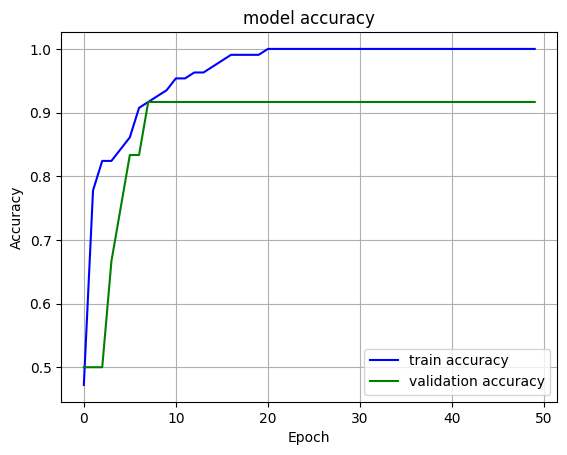

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score,classification_report

df=pd.read_csv('iris.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y)
y_categorical=to_categorical(y_encoded)

X_train,X_test,y_train,y_test=train_test_split(X,y_categorical,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=Sequential()
model.add(Dense(64,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,y_train,epochs=50,batch_size=10,validation_split=0.1,verbose=1)

y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_test_classes=np.argmax(y_test,axis=1)
accuracy=accuracy_score(y_test_classes,y_pred_classes)

print(f"Test Accuracy: {accuracy*100:.2f}%")
print(classification_report(y_test_classes,y_pred_classes,target_names=label_encoder.classes_))


sample=X_test[[0]]
pred=model.predict(sample)
cls=np.argmax(pred, axis=1)
print("Predicted:",label_encoder.inverse_transform(cls)[0])

plt.plot(history.history['accuracy'],label='train accuracy',color='blue')
plt.plot(history.history['val_accuracy'],label='validation accuracy',color='green')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)